## 1.2. MEG BASICS
**Purpose**: Load MEG data, inspect metadata, plot MEG signals, compute MEG PSD, compute topographic layouts


In [1]:
import sys
sys.path.append("../../") 
import mne

from neurolib.eeg_meg.io import load_meg_sample
from neurolib.eeg_meg.visualization import plot_raw, plot_psd, plot_meg_topomap

### Load MEG Data
This loads the MNE MEG sample dataset from datasets/meg_sample. The raw object stores continuous MEG signals and metadata.

The raw object contains:
- Continuous MEG signals from all sensors (magnetometers + gradiometers)
- Auxiliary channels (e.g., EEG, EOG, stim)
- Sampling frequency and measurement info
- Event markers for stimuli or triggers

In [2]:
raw = load_meg_sample()

Opening raw data file /Users/yibeisita/Documents/neuro-ai-playground/datasets/meg_sample/MNE-sample-data/MEG/sample/sample_audvis_raw.fif...
    Read a total of 3 projection items:
        PCA-v1 (1 x 102)  idle
        PCA-v2 (1 x 102)  idle
        PCA-v3 (1 x 102)  idle
    Range : 25800 ... 192599 =     42.956 ...   320.670 secs
Ready.
Reading 0 ... 166799  =      0.000 ...   277.714 secs...


### Inspecting the Metadata
Inspecting `raw.info` helps understand the sensor layout, sampling rate, and acquisition parameters.

Key info:
- 'sfreq': sampling frequency (Hz)
- 'ch_names': sensor names
- 'nchan': total number of channels
- 'highpass'/'lowpass' filters applied
- 'dev_head_t': device-to-head transformation

In [3]:
print(raw.info)

<Info | 21 non-empty values
 acq_pars: ACQch001 110113 ACQch002 110112 ACQch003 110111 ACQch004 110122 ...
 bads: 2 items (MEG 2443, EEG 053)
 ch_names: MEG 0113, MEG 0112, MEG 0111, MEG 0122, MEG 0123, MEG 0121, MEG ...
 chs: 204 Gradiometers, 102 Magnetometers, 9 Stimulus, 60 EEG, 1 EOG
 custom_ref_applied: False
 description: acquisition (megacq) VectorView system at NMR-MGH
 dev_head_t: MEG device -> head transform
 dig: 146 items (3 Cardinal, 4 HPI, 61 EEG, 78 Extra)
 events: 1 item (list)
 experimenter: MEG
 file_id: 4 items (dict)
 highpass: 0.1 Hz
 hpi_meas: 1 item (list)
 hpi_results: 1 item (list)
 lowpass: 172.2 Hz
 meas_date: 2002-12-03 19:01:10 UTC
 meas_id: 4 items (dict)
 nchan: 376
 proj_id: 1
 proj_name: test
 projs: PCA-v1: off, PCA-v2: off, PCA-v3: off
 sfreq: 600.6 Hz
>


### Plot Raw MEG Channels

Each line shows a channel’s signal over time. Useful for checking data quality and observing artifacts.

You can inspect:
- Signal amplitudes and noise levels
- Artifacts like heartbeats or eye blinks
- Differences between magnetometers and gradiometers


Using matplotlib as 2D backend.


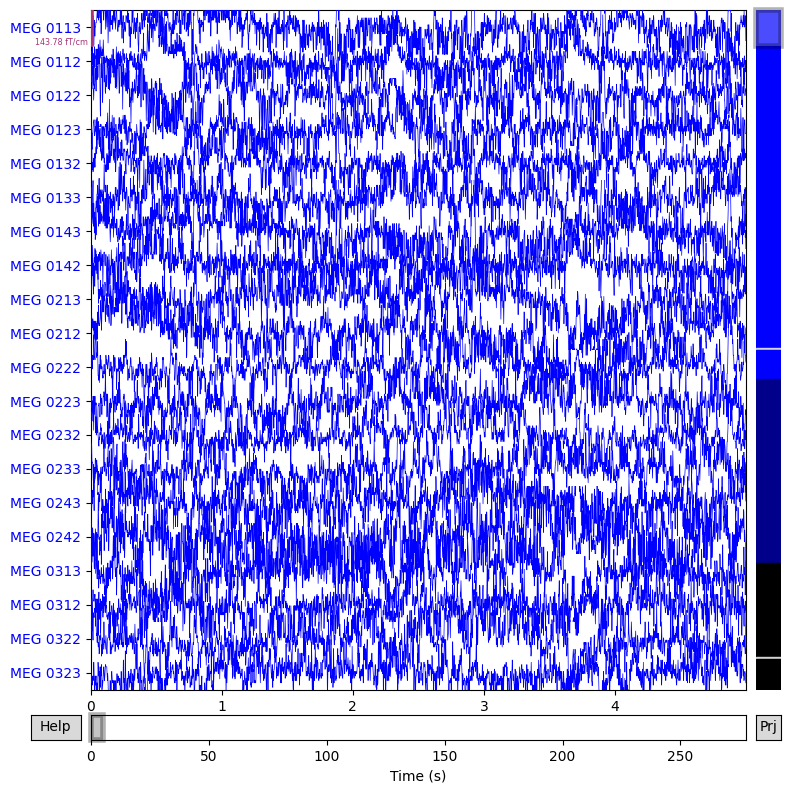

In [4]:
plot_raw(raw, n_channels=20, duration=5)

### Compute & Plot PSD
PSD shows power versus frequency. Power Spectral Density (PSD) plots reveal which frequencies are most prominent in your MEG data.

Helps identify dominant MEG frequency bands:
- Delta, Theta, Alpha, Beta, Gamma
- Detect environmental noise or line noise (~50/60 Hz)

Effective window size : 3.410 (s)
Plotting power spectral density (dB=True).


/Users/yibeisita/Documents/neuro-ai-playground/.venv/lib/python3.11/site-packages/mne/viz/utils.py:158: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


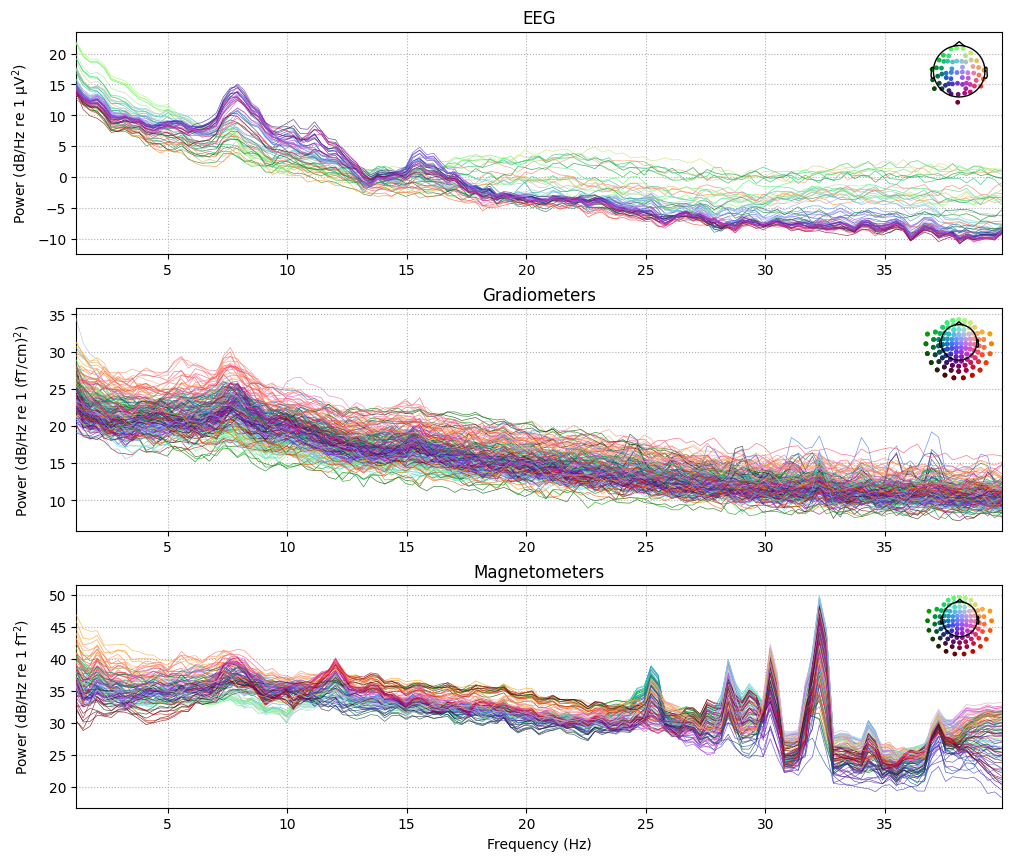

In [5]:
%matplotlib inline
plot_psd(raw)

### Plot MEG Topographic Maps
- Each sensor’s amplitude is represented as a color on a 2D head plot.
- Red areas indicate positive deflections (higher amplitude) at that time point.
- Blue areas indicate negative deflections (lower amplitude).
- White/neutral regions are near zero.
- By plotting multiple time points (e.g., 100ms, 200ms, 300ms), we can visualize how the neural response **propagates across the scalp** over time.
- These maps are derived from **averaged (Evoked) responses**, which reduces noise and highlights stimulus-locked activity.

In [6]:
events = mne.find_events(raw, stim_channel='STI 014')

event_id = {'Auditory/Left': 1, 'Auditory/Right': 2}

# Epoch data (0 to 0.5 s after stimulus)
epochs = mne.Epochs(raw, events, event_id=event_id, tmin=0, tmax=0.5, baseline=(0, 0.1), preload=True)

# Compute evoked responses
evoked_dict = {cond: epochs[cond].average() for cond in event_id}

Finding events on: STI 014
320 events found on stim channel STI 014
Event IDs: [ 1  2  3  4  5 32]
Not setting metadata
145 matching events found
Applying baseline correction (mode: mean)
Created an SSP operator (subspace dimension = 3)
3 projection items activated
Using data from preloaded Raw for 145 events and 301 original time points ...
0 bad epochs dropped


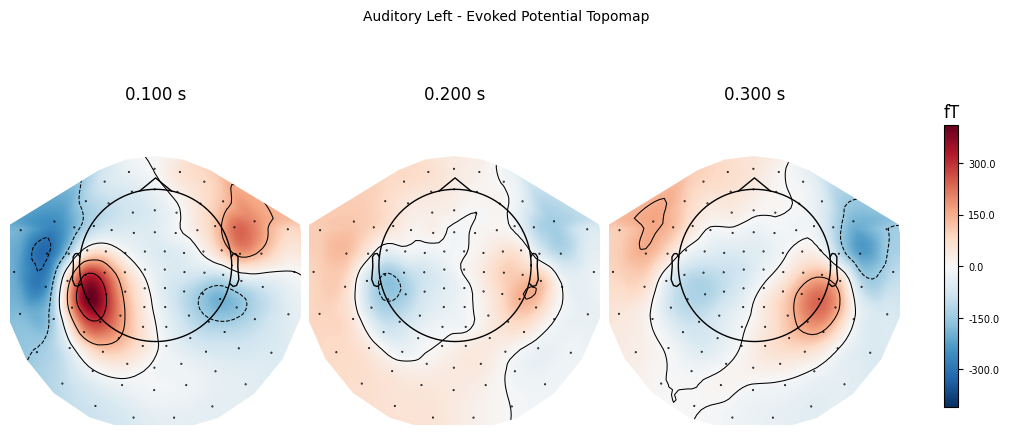

In [7]:
# Example: Auditory Left
plot_meg_topomap(
    evoked_dict['Auditory/Left'],
    times=[0.1, 0.2, 0.3],
    title="Auditory Left - Evoked Potential Topomap",
    figsize=(10,5)
)

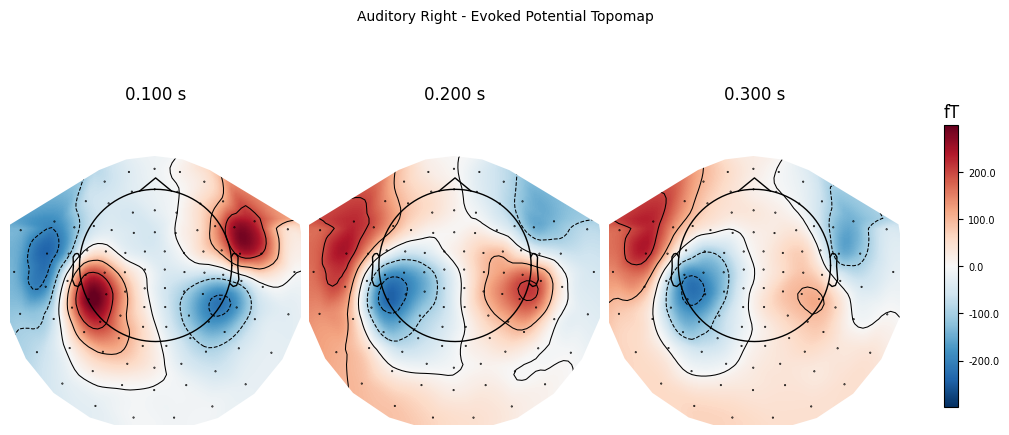

In [8]:
# Example: Auditory Right
plot_meg_topomap(
    evoked_dict['Auditory/Right'],
    times=[0.1, 0.2, 0.3],
    title="Auditory Right - Evoked Potential Topomap",
    figsize=(10,5)
)